In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset
orders = pd.read_csv('../PizzaPlaceSales/pizza_sales/order_summary.csv')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48592 entries, 0 to 48591
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48592 non-null  int64  
 1   order_details_id  48592 non-null  int64  
 2   o_date            48592 non-null  object 
 3   o_time            48592 non-null  object 
 4   pizza_id          48592 non-null  object 
 5   quantity          48592 non-null  int64  
 6   pizza_type_id     48592 non-null  object 
 7   size              48592 non-null  object 
 8   unit_price        48592 non-null  float64
 9   name              48592 non-null  object 
 10  category          48592 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [4]:
orders.describe()

,order_id,order_details_id,quantity,unit_price
count,48592.000000,48592.000000,48592.000000,48592.000000
mean,10701.841558,24311.322996,1.019633,16.482921
std,6180.167605,14035.645809,0.143117,3.592585
min,1.000000,1.000000,1.000000,9.750000
25%,5337.750000,12156.750000,1.000000,12.750000
50%,10685.000000,24313.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,25.500000


In [5]:
# Convert o_date and o_time to proper DateTime columns. Drop original

orders["date"] = pd.to_datetime(orders["o_date"])
orders['hour'] = pd.to_datetime(orders['o_time'], format='%H:%M:%S').dt.hour
orders.drop(columns=['o_date','o_time'],inplace=True)

In [6]:
orders.head()

,order_id,order_details_id,pizza_id,quantity,pizza_type_id,size,unit_price,name,category,date,hour
0,9,23,veggie_veg_s,1,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,2015-01-01,12
1,47,116,veggie_veg_s,1,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,2015-01-01,18
2,7,13,spinach_supr_s,1,spinach_supr,S,12.50,The Spinach Supreme Pizza,Supreme,2015-01-01,12
3,8,14,spinach_supr_s,1,spinach_supr,S,12.50,The Spinach Supreme Pizza,Supreme,2015-01-01,12
4,2,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,2015-01-01,11


In [7]:
# Calculate the total price for pizzas of same size and type within an order
orders['total_price']=orders["unit_price"].multiply(orders["quantity"], axis="index")

In [119]:
order_summary = orders.groupby(['date','hour']).aggregate({'order_id':'count', 'quantity':'sum', 'total_price':'sum'})

In [120]:
order_summary.head()

order_id  quantity  total_price
date       hour                                 
2015-01-01 11           6         6       105.25
           12          17        17       263.25
           13          32        33       577.20
           14          15        15       246.00
           15          14        14       230.25

In [121]:
order_summary.reset_index(inplace=True)

In [122]:
order_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4181 non-null   datetime64[ns]
 1   hour         4181 non-null   int64         
 2   order_id     4181 non-null   int64         
 3   quantity     4181 non-null   int64         
 4   total_price  4181 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 163.4 KB


In [123]:
order_summary['date'].dt.strftime('%Y-%m-%d')

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
4176    2015-12-31
4177    2015-12-31
4178    2015-12-31
4179    2015-12-31
4180    2015-12-31
Name: date, Length: 4181, dtype: object

In [124]:
# Combining the date+hour column to see if the timeseries plot will be useful for hourly data

order_summary["datetime"]  = order_summary['date'].dt.strftime('%Y-%m-%d') + order_summary["hour"].apply(lambda x: ' '+str(x).zfill(2)+":00:00")
order_summary['datetime'] = pd.to_datetime(order_summary["datetime"])

In [125]:
order_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4181 non-null   datetime64[ns]
 1   hour         4181 non-null   int64         
 2   order_id     4181 non-null   int64         
 3   quantity     4181 non-null   int64         
 4   total_price  4181 non-null   float64       
 5   datetime     4181 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 196.1 KB


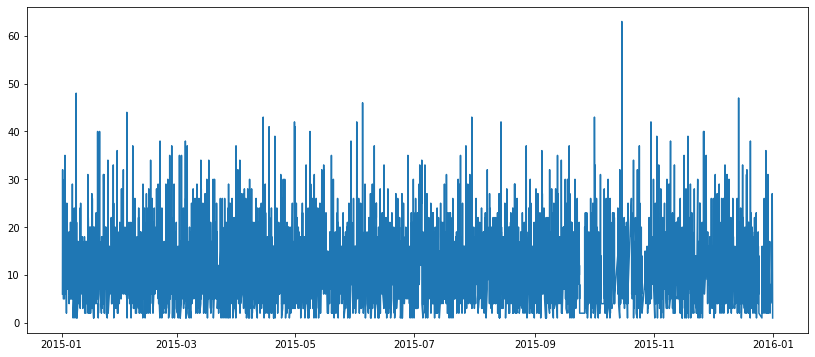

In [126]:
plt.figure(figsize=(14,6))
plt.plot(order_summary.datetime,order_summary.order_id)

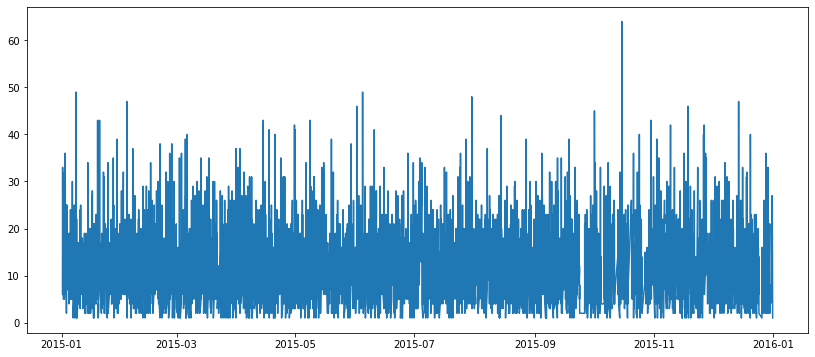

In [127]:
plt.figure(figsize=(14,6))
plt.plot(order_summary.datetime,order_summary.quantity)

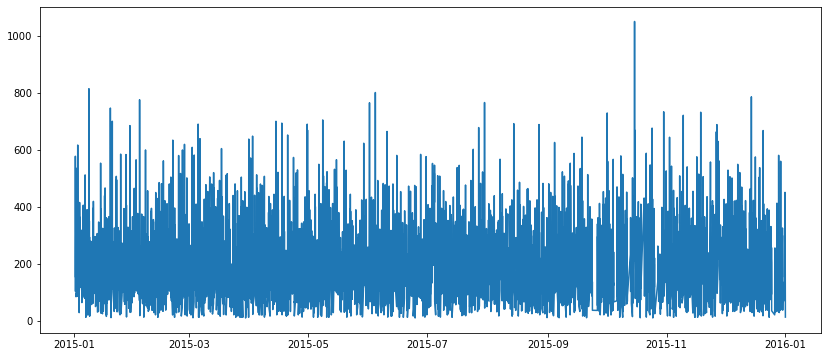

In [128]:
plt.figure(figsize=(14,6))
plt.plot(order_summary.datetime,order_summary.total_price)

In [129]:
# Its better to go with daily sales data instead. Let's rename the columns to more valid names.
daily_sales = orders.groupby(['date']).aggregate({'order_id':'count', 'quantity':'sum', 'total_price':'sum'})
daily_sales.rename(columns={'order_id':'order_counts', 'quantity':'pizza_counts', 'total_price':'total_revenue'}, inplace=True)

In [130]:
daily_sales.head()

,order_counts,pizza_counts,total_revenue
date,,,
2015-01-01,161,162,2713.85
2015-01-02,160,165,2731.90
2015-01-03,154,158,2662.40
2015-01-04,106,106,1755.45
2015-01-05,121,125,2065.95


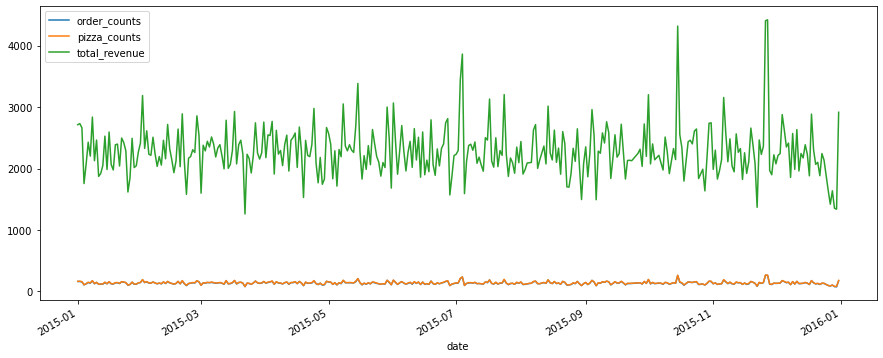

In [131]:
daily_sales.plot(figsize=(15,6));

In [132]:
(daily_sales['pizza_counts']-daily_sales['order_counts']).value_counts()

2    80
1    71
3    69
4    54
0    34
5    20
6    17
7     8
8     3
9     2
dtype: int64

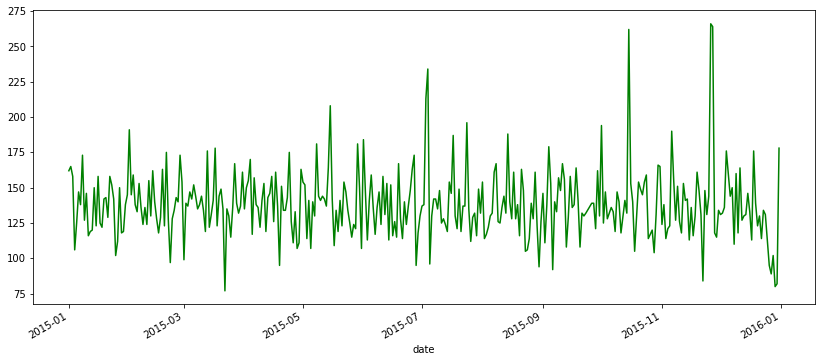

In [133]:
daily_sales['pizza_counts'].plot(figsize=(14,6), color='green');

In [134]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 2015-01-01 to 2015-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_counts   358 non-null    int64  
 1   pizza_counts   358 non-null    int64  
 2   total_revenue  358 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.2 KB


In [135]:
idx = pd.date_range(daily_sales.index.min(), daily_sales.index.max())
print('missing_dates are',idx.difference(daily_sales.index))

missing_dates are DatetimeIndex(['2015-09-24', '2015-09-25', '2015-10-05', '2015-10-12',
               '2015-10-19', '2015-10-26', '2015-12-25'],
              dtype='datetime64[ns]', freq=None)


In [146]:
# Create rows for days with no sales (pizza place closed) as 0
daily_sales = daily_sales.reindex(idx, fill_value=0)

In [147]:
daily_sales.shape

(365, 3)

<AxesSubplot:xlabel='order_counts', ylabel='Count'>

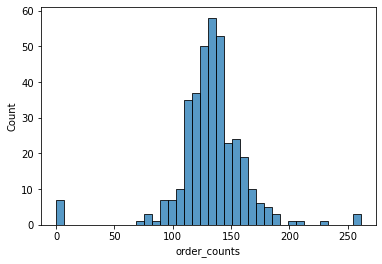

In [148]:
sns.histplot(data=daily_sales['order_counts'])

<AxesSubplot:xlabel='total_revenue', ylabel='Count'>

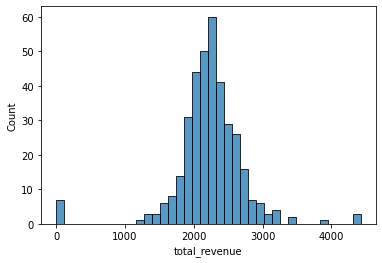

In [149]:
sns.histplot(data=daily_sales['total_revenue'])

<AxesSubplot:xlabel='pizza_counts', ylabel='Count'>

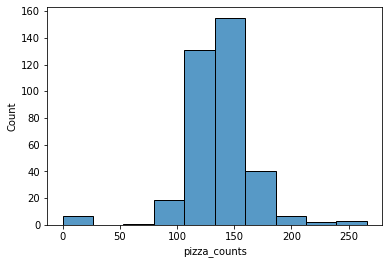

In [150]:
sns.histplot(data=daily_sales['pizza_counts'], bins=10)

In [151]:
x = daily_sales.reset_index()

In [158]:
x.rename(columns={'index':'date'}, inplace=True)

In [159]:
x['day'] = x.date.dt.day_name()
x['month'] = x.date.dt.month_name()

In [160]:
x.head()

,date,order_counts,pizza_counts,total_revenue,day,month
0,2015-01-01,161,162,2713.85,Thursday,January
1,2015-01-02,160,165,2731.90,Friday,January
2,2015-01-03,154,158,2662.40,Saturday,January
3,2015-01-04,106,106,1755.45,Sunday,January
4,2015-01-05,121,125,2065.95,Monday,January


In [161]:
x[['order_counts', 'pizza_counts', 'total_revenue']].mean()

order_counts      133.128767
pizza_counts      135.742466
total_revenue    2237.954658
dtype: float64

In [162]:
aggregates = x[['order_counts', 'pizza_counts', 'total_revenue', 'day', 'month']].groupby(['day','month']).agg(['min', 'max', 'mean', 'median'])

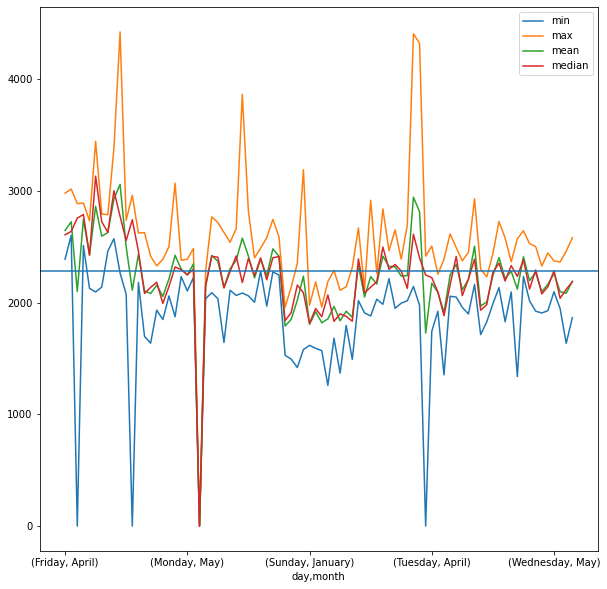

In [163]:
aggregates['total_revenue'].plot(figsize=(10,10))
plt.axhline(y=2281.7)

<AxesSubplot:xlabel='day,month'>

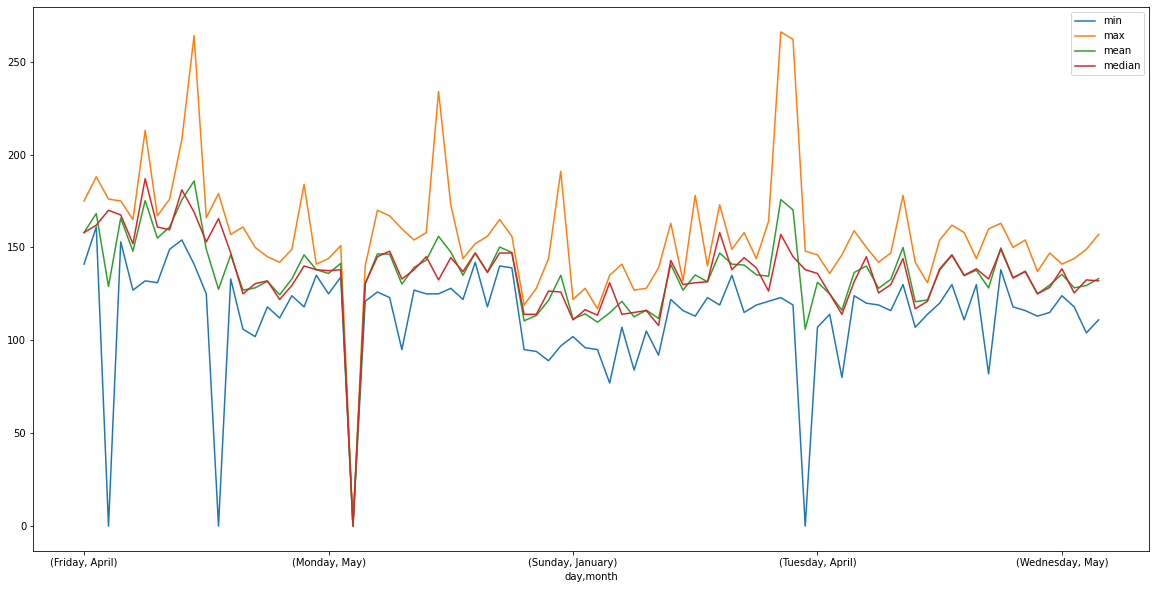

In [164]:
aggregates['pizza_counts'].plot(figsize=(20,10))

<AxesSubplot:xlabel='day,month'>

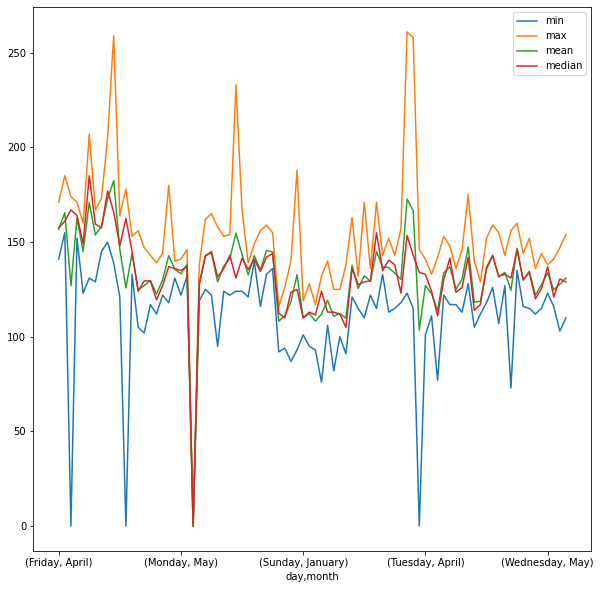

In [165]:
aggregates['order_counts'].plot(figsize=(10,10))

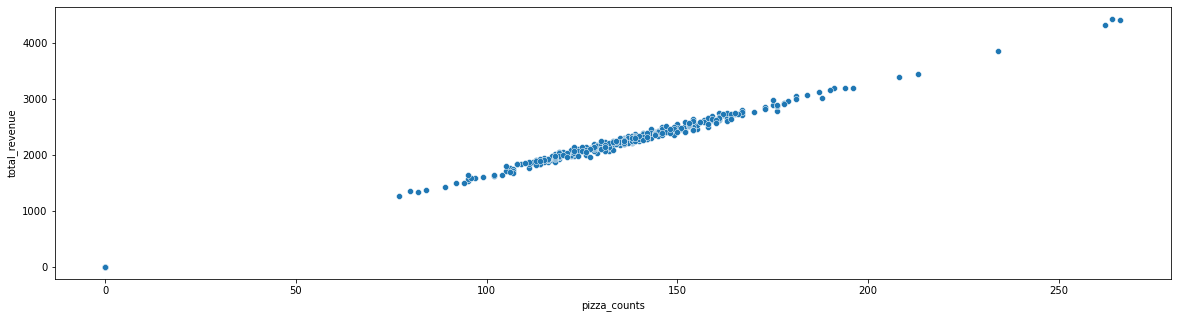

In [166]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=x, x='pizza_counts', y='total_revenue');

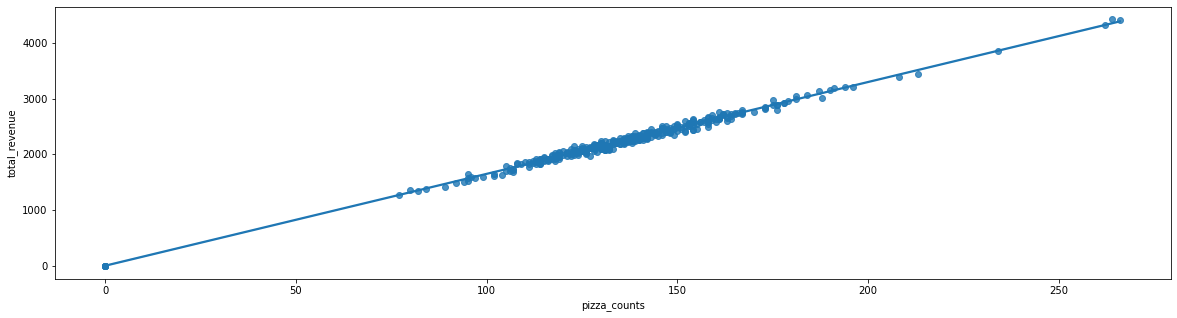

In [167]:
plt.figure(figsize=(20,5))
sns.regplot(data=x, x='pizza_counts', y='total_revenue');

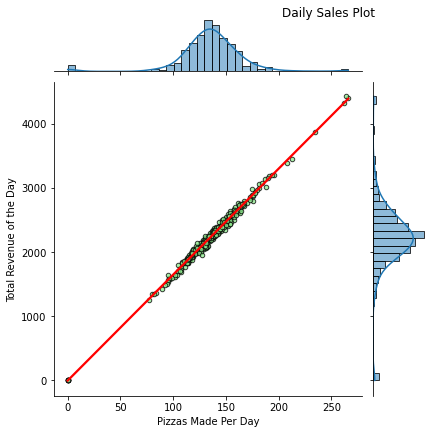

In [168]:
g = sns.jointplot(data=x, x='pizza_counts', y='total_revenue', kind='reg',
                   joint_kws= {'line_kws': {'color':'red'}, 'color':'lightgreen'},
                   scatter_kws= {'s':20, 'alpha':0.75, 'edgecolor':'black'})
g.ax_joint.set_xlabel('Pizzas Made Per Day')
g.ax_joint.set_ylabel('Total Revenue of the Day')
g.fig.suptitle('Daily Sales Plot', x=0.75,y=1);

In [169]:
weekly_sales = daily_sales

In [170]:
weekly_sales['week'] = weekly_sales.index.week

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_21344/2266821961.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  weekly_sales['week'] = weekly_sales.index.week


In [171]:
weekly_sales.reset_index(inplace=True)

In [172]:
weekly_sales = weekly_sales[['order_counts', 'pizza_counts','total_revenue','week']].groupby('week').agg('sum')

In [173]:
weekly_sales

,order_counts,pizza_counts,total_revenue
week,,,
1,581,591,9863.60
2,951,972,15999.05
3,898,917,15115.95
4,952,968,15652.80
5,960,973,16279.20
6,972,988,16175.70
7,959,975,16049.60
8,913,932,15309.95
9,956,971,15925.85


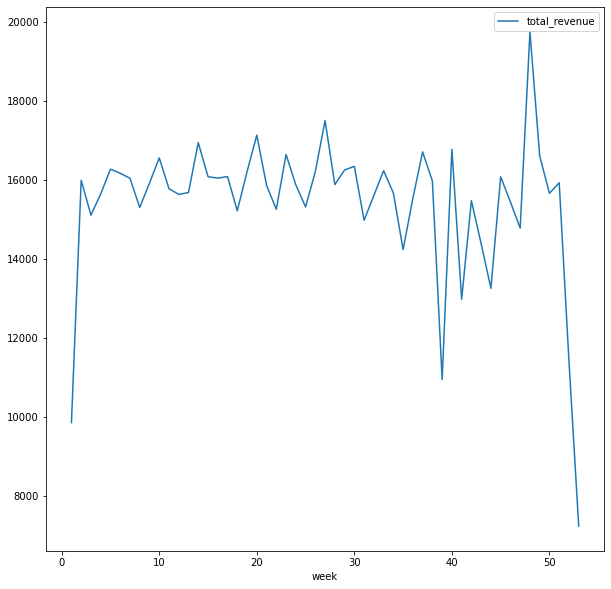

In [174]:
weekly_sales.plot(y='total_revenue', figsize=(10,10));

In [175]:
from statsmodels.tsa.stattools import adfuller

In [176]:
# Reference https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/
# Null hypothesis is Data is non-stationary.
def run_adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis. We cannot reject the null hypothesis. Data is non-stationary ")

In [177]:
run_adfuller_test(weekly_sales['total_revenue'])

ADF Test Statistic : -4.8896228788490115
p-value : 3.653317301282414e-05
#Lags Used : 0
Number of Observations : 52
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [178]:
run_adfuller_test(weekly_sales['pizza_counts'])

ADF Test Statistic : -4.787385196171703
p-value : 5.748985242458673e-05
#Lags Used : 0
Number of Observations : 52
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [179]:
run_adfuller_test(daily_sales['total_revenue'])

ADF Test Statistic : -3.7736737319096885
p-value : 0.0031884485214221333
#Lags Used : 14
Number of Observations : 350
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [180]:
run_adfuller_test(daily_sales['pizza_counts'])

ADF Test Statistic : -3.692790799379171
p-value : 0.0042157083318179606
#Lags Used : 14
Number of Observations : 350
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


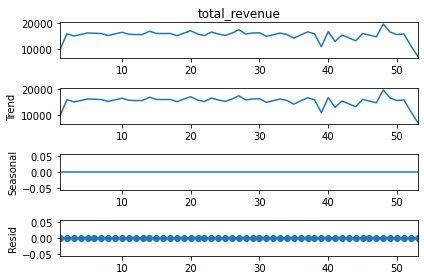

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(weekly_sales['total_revenue'], period=1)
decomp.plot()
plt.rcParams.update({'figure.figsize': (10,5)})
plt.show()

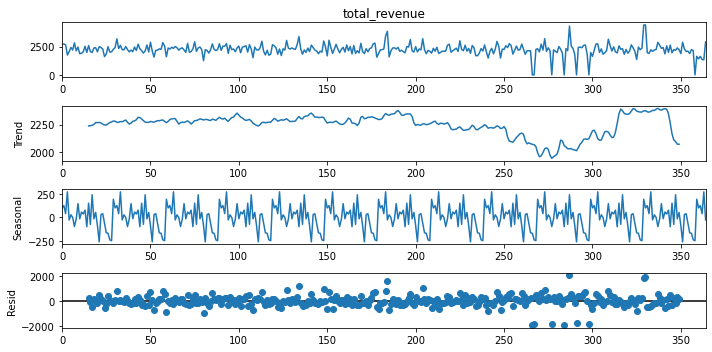

In [301]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(daily_sales['total_revenue'], period=30)
decomp.plot()
plt.rcParams.update({'figure.figsize': (10,5)})
plt.show()

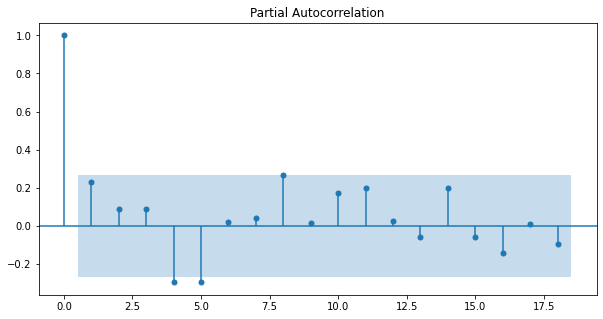

In [183]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf =  plot_pacf(weekly_sales['total_revenue'].values.squeeze(), method='ols')

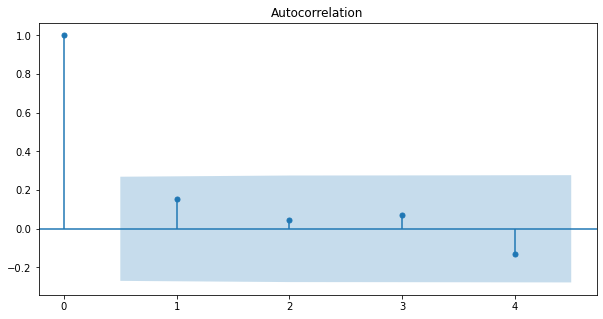

In [298]:
from statsmodels.graphics.tsaplots import plot_acf
acf =  plot_acf(weekly_sales['total_revenue'].values.squeeze(), lags=4)

In [189]:
daily_sales.rename(columns={'index':'date'}, inplace=True)

In [192]:
df = daily_sales.drop(columns=['week'])

In [220]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast
0,2015-01-01,979,1001,16560.70,NaN
1,2015-01-08,932,951,15798.00,NaN
2,2015-01-15,924,942,15445.50,NaN
3,2015-01-22,923,934,15183.75,NaN
4,2015-01-29,1015,1035,17099.95,NaN


In [221]:
downsample = df[['date',
                 'order_counts', 
                 'pizza_counts',
                 'total_revenue', 
                 ]].resample('7D', on='date').sum().reset_index(drop=False)

df = downsample.copy()

In [222]:
df.head()

,date,order_counts,pizza_counts,total_revenue
0,2015-01-01,979,1001,16560.70
1,2015-01-08,932,951,15798.00
2,2015-01-15,924,942,15445.50
3,2015-01-22,923,934,15183.75
4,2015-01-29,1015,1035,17099.95


In [260]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 0, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -475.085
Date:                Tue, 10 Jan 2023   AIC                            960.169
Time:                        02:17:57   BIC                            970.021
Sample:                             0   HQIC                           963.958
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.539e+04    752.138     20.463      0.000    1.39e+04    1.69e+04
ma.L1          0.8155      0.154      5.310      0.000       0.514       1.116
ma.L2          0.3177      0.315      1.008      0.314      -0.300       0.936
ma.L3         -0.0854      0.288     -0.297      0.767      -0.649       0.479
sigma2      3.518e+06   6.97e+05      5.043      0.000    2.15e+06    4.88e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                69.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              12.20   Skew:                            -1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

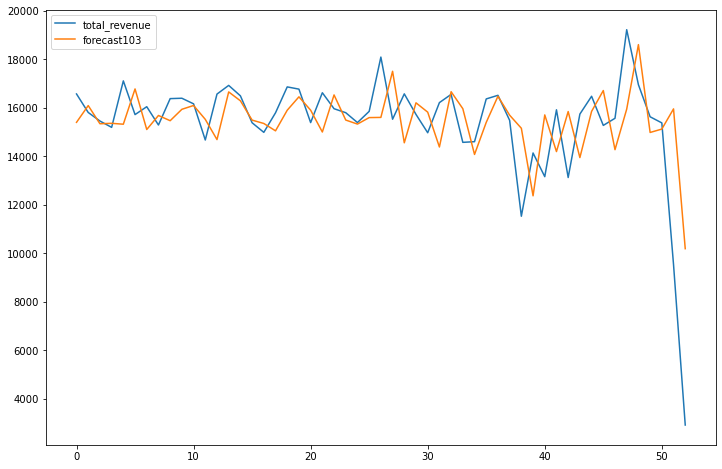

In [266]:
df['forecast103']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast103']].plot(figsize=(12,8));

In [303]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'][:44], order=(2, 0, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   44
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -368.832
Date:                Tue, 10 Jan 2023   AIC                            751.664
Time:                        02:37:56   BIC                            764.154
Sample:                             0   HQIC                           756.296
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.567e+04    856.205     18.306      0.000     1.4e+04    1.74e+04
ar.L1          0.0630      0.940      0.067      0.947      -1.780       1.906
ar.L2          0.7456      0.720      1.036      0.300      -0.665       2.156
ma.L1          0.2067      0.986      0.210      0.834      -1.725       2.139
ma.L2         -0.4810      1.035     -0.465      0.642      -2.510       1.548
ma.L3         -0.2992      0.454     -0.659      0.510      -1.188       0.590
sigma2      1.103e+06   1.77e+05      6.220      0.000    7.55e+05    1.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                26.72
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                            -0.99
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

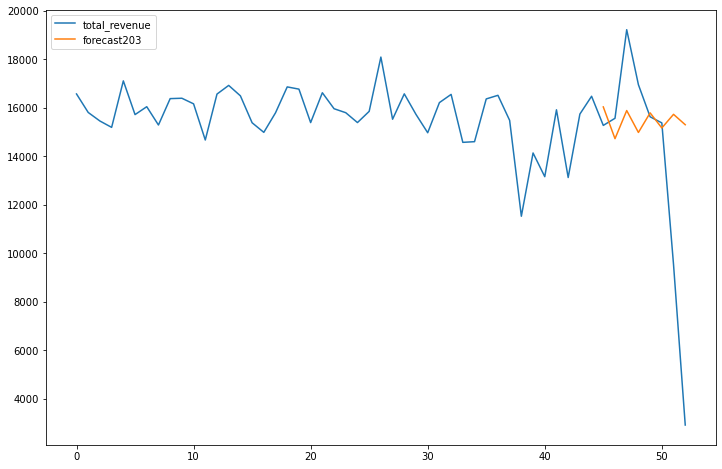

In [304]:
df['forecast203']=arima_fit.predict(start=45,end=54)
df[['total_revenue','forecast203']].plot(figsize=(12,8));

In [273]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(2, 0, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -474.695
Date:                Tue, 10 Jan 2023   AIC                            959.390
Time:                        02:22:10   BIC                            969.242
Sample:                             0   HQIC                           963.179
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.539e+04    614.927     25.031      0.000    1.42e+04    1.66e+04
ar.L1          1.4921      0.773      1.930      0.054      -0.023       3.007
ar.L2         -0.6827      0.523     -1.304      0.192      -1.708       0.343
ma.L1         -0.6587      0.789     -0.835      0.404      -2.205       0.888
sigma2      3.442e+06   7.56e+05      4.552      0.000    1.96e+06    4.92e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                53.49
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               9.32   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

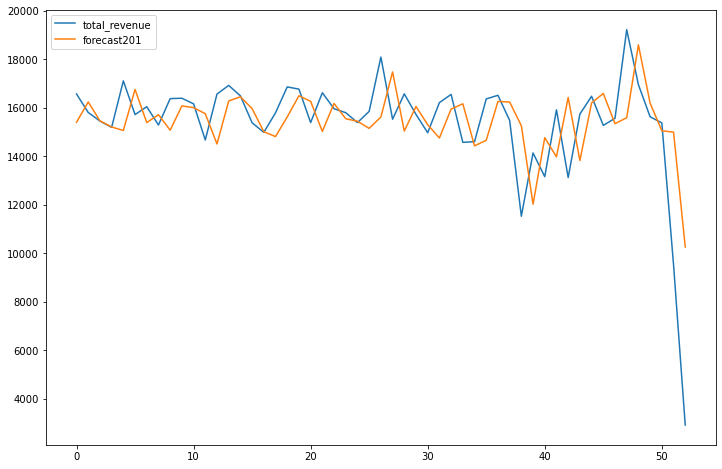

In [274]:
df['forecast201']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast201']].plot(figsize=(12,8));

In [275]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201
0,2015-01-01,979,1001,16560.70,15391.048117,15389.806233,15392.062039
1,2015-01-08,932,951,15798.00,16081.949996,16282.377350,16231.910087
2,2015-01-15,924,942,15445.50,15333.111944,15476.442805,15453.814389
3,2015-01-22,923,934,15183.75,15350.968577,15137.359869,15199.905631
4,2015-01-29,1015,1035,17099.95,15313.666666,14906.806005,15055.191884


In [276]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(2, 1, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -466.791
Date:                Tue, 10 Jan 2023   AIC                            941.581
Time:                        02:23:46   BIC                            949.386
Sample:                             0   HQIC                           944.574
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0125     13.235     -0.001      0.999     -25.952      25.927
ar.L2         -0.0136      0.666     -0.020      0.984      -1.318       1.291
ma.L1         -0.0390     13.227     -0.003      0.998     -25.963      25.885
sigma2      3.887e+06   8.62e+05      4.511      0.000     2.2e+06    5.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.80   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

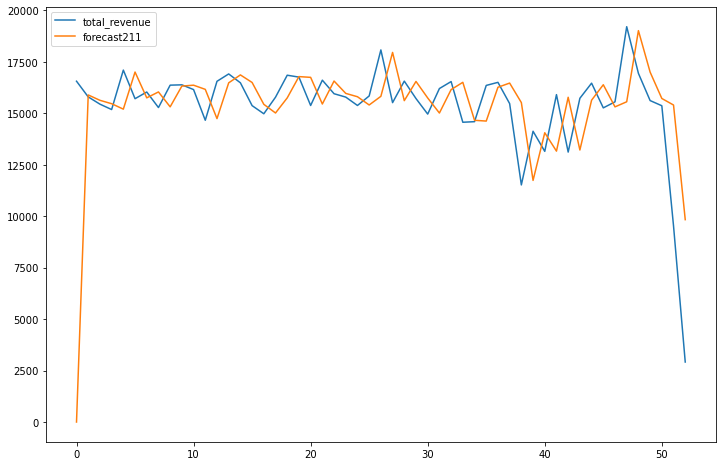

In [277]:
df['forecast211']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast211']].plot(figsize=(12,8));

In [278]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 1, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -465.559
Date:                Tue, 10 Jan 2023   AIC                            941.119
Time:                        02:24:42   BIC                            950.875
Sample:                             0   HQIC                           944.859
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8130      0.372     -2.183      0.029      -1.543      -0.083
ma.L1          0.8111      0.322      2.522      0.012       0.181       1.441
ma.L2         -0.0568      0.275     -0.207      0.836      -0.596       0.483
ma.L3         -0.1431      0.259     -0.551      0.581      -0.652       0.365
sigma2       3.49e+06   6.02e+05      5.799      0.000    2.31e+06    4.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              15.35   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

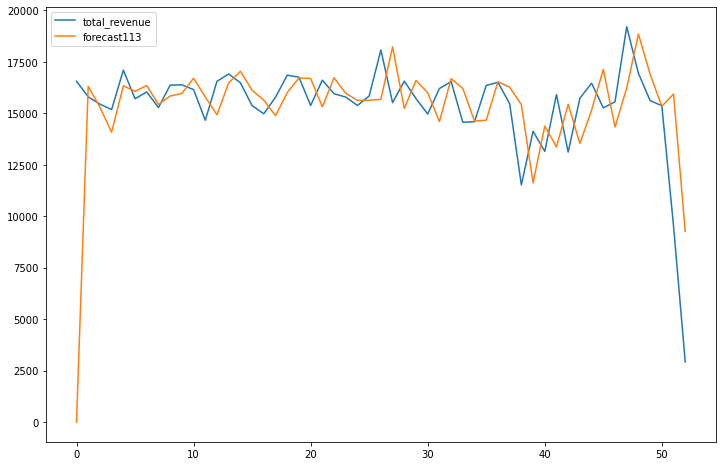

In [279]:
df['forecast113']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast113']].plot(figsize=(12,8));

In [280]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113
0,2015-01-01,979,1001,16560.70,15391.048117,15389.806233,15392.062039,0.000000,0.000000
1,2015-01-08,932,951,15798.00,16081.949996,16282.377350,16231.910087,15892.727195,16315.237980
2,2015-01-15,924,942,15445.50,15333.111944,15476.442805,15453.814389,15632.590581,15297.015258
3,2015-01-22,923,934,15183.75,15350.968577,15137.359869,15199.905631,15467.529624,14080.903725
4,2015-01-29,1015,1035,17099.95,15313.666666,14906.806005,15055.191884,15202.861025,16337.550085


In [281]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 0, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -475.406
Date:                Tue, 10 Jan 2023   AIC                            958.812
Time:                        02:26:33   BIC                            966.693
Sample:                             0   HQIC                           961.843
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.541e+04   1322.032     11.658      0.000    1.28e+04     1.8e+04
ar.L1          0.6857      0.413      1.660      0.097      -0.124       1.495
ma.L1          0.1311      0.396      0.331      0.740      -0.645       0.907
sigma2      3.822e+06   7.68e+05      4.977      0.000    2.32e+06    5.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                65.96
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              10.98   Skew:                            -1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

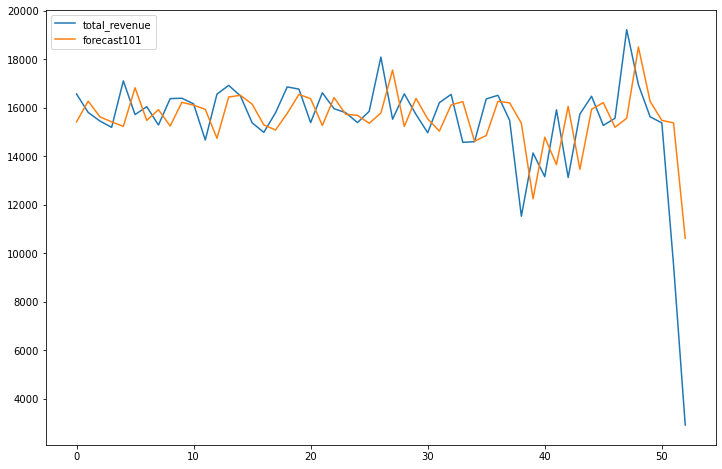

In [282]:
df['forecast101']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast101']].plot(figsize=(12,8));

In [283]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 1, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   53
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -466.795
Date:                Tue, 10 Jan 2023   AIC                            939.590
Time:                        02:26:47   BIC                            945.444
Sample:                             0   HQIC                           941.834
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1075      5.225      0.021      0.984     -10.133      10.348
ma.L1         -0.1583      5.251     -0.030      0.976     -10.450      10.133
sigma2      3.889e+06   8.38e+05      4.638      0.000    2.25e+06    5.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.75   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

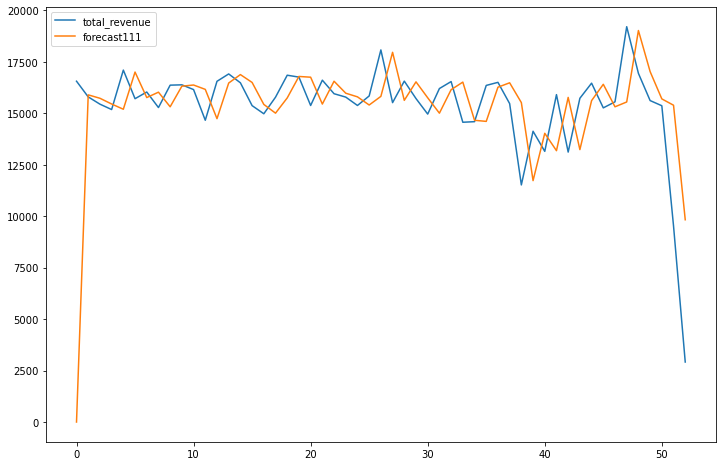

In [284]:
df['forecast111']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast111']].plot(figsize=(12,8));

In [286]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113,forecast101,forecast111
0,2015-01-01,979,1001,16560.70,15391.048117,15389.806233,15392.062039,0.000000,0.000000,15412.328629,0.000000
1,2015-01-08,932,951,15798.00,16081.949996,16282.377350,16231.910087,15892.727195,16315.237980,16266.440702,15897.132680
2,2015-01-15,924,942,15445.50,15333.111944,15476.442805,15453.814389,15632.590581,15297.015258,15615.959650,15731.660849
3,2015-01-22,923,934,15183.75,15350.968577,15137.359869,15199.905631,15467.529624,14080.903725,15412.729384,15452.889766
4,2015-01-29,1015,1035,17099.95,15313.666666,14906.806005,15055.191884,15202.861025,16337.550085,15225.562961,15198.205463


In [287]:
df['forecast103'] -= df['total_revenue']

In [288]:
df['forecast203'] -= df['total_revenue']
df['forecast201'] -= df['total_revenue']
df['forecast211'] -= df['total_revenue']
df['forecast113'] -= df['total_revenue']
df['forecast101'] -= df['total_revenue']
df['forecast111'] -= df['total_revenue']

In [291]:
square_errors = df[['forecast103','forecast203','forecast201','forecast211','forecast113','forecast101','forecast111']].apply(lambda x : x*x)

In [294]:
np.sqrt(square_errors.sum())

forecast103    13686.862086
forecast203    13371.357681
forecast201    13563.510936
forecast211    21558.036633
forecast113    21352.727237
forecast101    13753.070838
forecast111    21558.674943
dtype: float64

In [299]:
# The lowest error in ARIMA model is of parameters - 2,0,3  p = 2, d=0, q=3